In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 8.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=284c6eda2c64f80f9f66b9c9cfbb3fff7914859e18d318a39ba27dd5d8e4f688
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
import yfinance as yf

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "PFE",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "60d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "30m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2020-12-23 09:30:00-05:00,37.005001,37.459999,36.880001,37.180000,7752711
2020-12-23 10:00:00-05:00,37.174999,37.619999,37.168201,37.505001,4343617
2020-12-23 10:30:00-05:00,37.505001,37.650002,37.470001,37.563999,3142124
2020-12-23 11:00:00-05:00,37.560001,37.567402,37.419998,37.435001,2118638
2020-12-23 11:30:00-05:00,37.430000,37.610001,37.410000,37.610001,1903290
...,...,...,...,...,...
2021-03-22 13:30:00-04:00,35.889999,35.919998,35.869999,35.900002,1309226
2021-03-22 14:00:00-04:00,35.895000,35.930000,35.880001,35.913300,930842
2021-03-22 14:30:00-04:00,35.919998,35.970001,35.910000,35.950001,969220


In [5]:
prices = data.reset_index()
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype                           
---  ------    --------------  -----                           
 0   Datetime  775 non-null    datetime64[ns, America/New_York]
 1   Open      775 non-null    float64                         
 2   High      775 non-null    float64                         
 3   Low       775 non-null    float64                         
 4   Close     775 non-null    float64                         
 5   Volume    775 non-null    int64                           
dtypes: datetime64[ns, America/New_York](1), float64(4), int64(1)
memory usage: 36.5 KB


In [6]:
prices['Datetime'] = prices['Datetime'].astype(str)

In [7]:
#remove -5:00
prices['Datetime'] = prices['Datetime'].str.replace('-05:00',"")

In [8]:
prices = prices[(prices['Datetime']>= '2021-01-06 09:30:00') & (prices['Datetime']<='2021-02-13 15:30:00')]
prices

,Datetime,Open,High,Low,Close,Volume
99,2021-01-06 09:30:00,36.830002,37.169998,36.799999,37.064999,4117015
100,2021-01-06 10:00:00,37.049999,37.250000,37.020000,37.189999,2134119
101,2021-01-06 10:30:00,37.180000,37.349998,37.180000,37.294998,1971468
102,2021-01-06 11:00:00,37.294998,37.349998,37.240002,37.340000,1376661
103,2021-01-06 11:30:00,37.342602,37.389999,37.150002,37.150002,1796483
...,...,...,...,...,...,...
445,2021-02-12 13:30:00,34.775002,34.790001,34.755001,34.770000,874136
446,2021-02-12 14:00:00,34.775002,34.779999,34.680000,34.700001,1264453
447,2021-02-12 14:30:00,34.700001,34.720001,34.650002,34.654999,961477
448,2021-02-12 15:00:00,34.650002,34.700001,34.619999,34.630001,1449796


In [10]:
sentiment = pd.read_csv('/content/drive/MyDrive/FA PROJECT 2021/Correlation/Pfizer/pfe_tweets_1Month.csv',lineterminator='\n')
sentiment.head()

,Datetime,Text,processed_tweet
0,2021-01-06 00:02:28+00:00,US COVID-19 vaccine pace will soon 'massively'...,us covid vaccine pace will soon massively quic...
1,2021-01-06 00:15:00+00:00,Has a COVID-19 Vaccine Price War Started?\n\n....,has a covid vaccine price war started just di...
2,2021-01-06 00:17:35+00:00,Trading Ideas: PFE 37: Boring but good Risk/Re...,trading ideas pfe boring but good riskreward i...
3,2021-01-06 00:19:15+00:00,Where the Heck is Jack Ma? 💻📵⚖️📦🇨🇳 $BABA $TCEH...,where the heck is jack ma baba tcehy bidu jd ...
4,2021-01-06 00:35:07+00:00,Biotech Runner in the Making: FDA Green Light ...,biotech runner in the making fda green light c...


In [11]:
sentiment = sentiment.rename(columns={'Datetime': 'created_at'})

In [12]:
#remove +00:00
sentiment['created_at'] = sentiment['created_at'].str.slice(0,19)
sentiment.head()

,created_at,Text,processed_tweet
0,2021-01-06 00:02:28,US COVID-19 vaccine pace will soon 'massively'...,us covid vaccine pace will soon massively quic...
1,2021-01-06 00:15:00,Has a COVID-19 Vaccine Price War Started?\n\n....,has a covid vaccine price war started just di...
2,2021-01-06 00:17:35,Trading Ideas: PFE 37: Boring but good Risk/Re...,trading ideas pfe boring but good riskreward i...
3,2021-01-06 00:19:15,Where the Heck is Jack Ma? 💻📵⚖️📦🇨🇳 $BABA $TCEH...,where the heck is jack ma baba tcehy bidu jd ...
4,2021-01-06 00:35:07,Biotech Runner in the Making: FDA Green Light ...,biotech runner in the making fda green light c...


In [13]:
# convert datetime and created at to same datetime object
prices['Datetime'] = pd.to_datetime(prices['Datetime'])
sentiment['created_at'] = pd.to_datetime(sentiment['created_at'])

In [14]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 99 to 449
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  351 non-null    datetime64[ns]
 1   Open      351 non-null    float64       
 2   High      351 non-null    float64       
 3   Low       351 non-null    float64       
 4   Close     351 non-null    float64       
 5   Volume    351 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 19.2 KB


In [15]:
prices

,Datetime,Open,High,Low,Close,Volume
99,2021-01-06 09:30:00,36.830002,37.169998,36.799999,37.064999,4117015
100,2021-01-06 10:00:00,37.049999,37.250000,37.020000,37.189999,2134119
101,2021-01-06 10:30:00,37.180000,37.349998,37.180000,37.294998,1971468
102,2021-01-06 11:00:00,37.294998,37.349998,37.240002,37.340000,1376661
103,2021-01-06 11:30:00,37.342602,37.389999,37.150002,37.150002,1796483
...,...,...,...,...,...,...
445,2021-02-12 13:30:00,34.775002,34.790001,34.755001,34.770000,874136
446,2021-02-12 14:00:00,34.775002,34.779999,34.680000,34.700001,1264453
447,2021-02-12 14:30:00,34.700001,34.720001,34.650002,34.654999,961477
448,2021-02-12 15:00:00,34.650002,34.700001,34.619999,34.630001,1449796


In [16]:
# only close column is needed
prices = prices.drop(columns=['Open','High','Low','Volume'])

In [17]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   created_at       10200 non-null  datetime64[ns]
 1   Text             10200 non-null  object        
 2   processed_tweet  10200 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 239.2+ KB


In [18]:
sentiment

,created_at,Text,processed_tweet
0,2021-01-06 00:02:28,US COVID-19 vaccine pace will soon 'massively'...,us covid vaccine pace will soon massively quic...
1,2021-01-06 00:15:00,Has a COVID-19 Vaccine Price War Started?\n\n....,has a covid vaccine price war started just di...
2,2021-01-06 00:17:35,Trading Ideas: PFE 37: Boring but good Risk/Re...,trading ideas pfe boring but good riskreward i...
3,2021-01-06 00:19:15,Where the Heck is Jack Ma? 💻📵⚖️📦🇨🇳 $BABA $TCEH...,where the heck is jack ma baba tcehy bidu jd ...
4,2021-01-06 00:35:07,Biotech Runner in the Making: FDA Green Light ...,biotech runner in the making fda green light c...
...,...,...,...
10195,2021-02-12 22:50:00,BioPharmCatalyst updates 02/12/21\n\n$GTHX FDA...,biopharmcatalyst updates gthx fda approval prt...
10196,2021-02-12 23:24:11,U.S. FDA Approves PANZYGA® for the Treatment o...,us fda approves panzyga for the treatment of a...
10197,2021-02-12 23:28:56,"Where to Invest $5,000 Right Now @themotleyfoo...",where to invest right now stocks abbv spy goog...
10198,2021-02-12 23:43:11,CANADA FX DEBT-Canadian dollar holds on to wee...,canada fx debtcanadian dollar holds on to week...


In [19]:
sentiment = sentiment.rename(columns={'created_at': 'Datetime'})
sentiment

,Datetime,Text,processed_tweet
0,2021-01-06 00:02:28,US COVID-19 vaccine pace will soon 'massively'...,us covid vaccine pace will soon massively quic...
1,2021-01-06 00:15:00,Has a COVID-19 Vaccine Price War Started?\n\n....,has a covid vaccine price war started just di...
2,2021-01-06 00:17:35,Trading Ideas: PFE 37: Boring but good Risk/Re...,trading ideas pfe boring but good riskreward i...
3,2021-01-06 00:19:15,Where the Heck is Jack Ma? 💻📵⚖️📦🇨🇳 $BABA $TCEH...,where the heck is jack ma baba tcehy bidu jd ...
4,2021-01-06 00:35:07,Biotech Runner in the Making: FDA Green Light ...,biotech runner in the making fda green light c...
...,...,...,...
10195,2021-02-12 22:50:00,BioPharmCatalyst updates 02/12/21\n\n$GTHX FDA...,biopharmcatalyst updates gthx fda approval prt...
10196,2021-02-12 23:24:11,U.S. FDA Approves PANZYGA® for the Treatment o...,us fda approves panzyga for the treatment of a...
10197,2021-02-12 23:28:56,"Where to Invest $5,000 Right Now @themotleyfoo...",where to invest right now stocks abbv spy goog...
10198,2021-02-12 23:43:11,CANADA FX DEBT-Canadian dollar holds on to wee...,canada fx debtcanadian dollar holds on to week...


In [20]:
# drop na of sentiment
sentiment = sentiment.dropna()

In [21]:
df_merge = pd.merge_asof(sentiment,prices,left_on='Datetime',right_on="Datetime",direction='backward')
df_merge

,Datetime,Text,processed_tweet,Close
0,2021-01-06 00:02:28,US COVID-19 vaccine pace will soon 'massively'...,us covid vaccine pace will soon massively quic...,NaN
1,2021-01-06 00:15:00,Has a COVID-19 Vaccine Price War Started?\n\n....,has a covid vaccine price war started just di...,NaN
2,2021-01-06 00:17:35,Trading Ideas: PFE 37: Boring but good Risk/Re...,trading ideas pfe boring but good riskreward i...,NaN
3,2021-01-06 00:19:15,Where the Heck is Jack Ma? 💻📵⚖️📦🇨🇳 $BABA $TCEH...,where the heck is jack ma baba tcehy bidu jd ...,NaN
4,2021-01-06 00:35:07,Biotech Runner in the Making: FDA Green Light ...,biotech runner in the making fda green light c...,NaN
...,...,...,...,...
10195,2021-02-12 22:50:00,BioPharmCatalyst updates 02/12/21\n\n$GTHX FDA...,biopharmcatalyst updates gthx fda approval prt...,34.720001
10196,2021-02-12 23:24:11,U.S. FDA Approves PANZYGA® for the Treatment o...,us fda approves panzyga for the treatment of a...,34.720001
10197,2021-02-12 23:28:56,"Where to Invest $5,000 Right Now @themotleyfoo...",where to invest right now stocks abbv spy goog...,34.720001
10198,2021-02-12 23:43:11,CANADA FX DEBT-Canadian dollar holds on to wee...,canada fx debtcanadian dollar holds on to week...,34.720001


In [22]:
df_merge1 = df_merge[df_merge.Close.notnull()]
df_merge1

,Datetime,Text,processed_tweet,Close
44,2021-01-06 09:43:08,WHO’s China Rebuke; Israel Runs Low on Vaccine...,whos china rebuke israel runs low on vaccines ...,37.064999
45,2021-01-06 10:11:15,UPDATE 1-European drugs authority meets again ...,updateeuropean drugs authority meets again ove...,37.189999
46,2021-01-06 10:31:39,Debate Forming if Vaccines Protect You From Ne...,debate forming if vaccines protect you from ne...,37.294998
47,2021-01-06 10:41:55,$SHWZ$1.65 - Dem's WON! Decriminalize Pot is O...,shwz dems won decriminalize pot is on weed st...,37.294998
48,2021-01-06 10:51:32,Major Red Flag - Covid Variant - 4 Cases Under...,major red flag covid variant cases under yea...,37.294998
...,...,...,...,...
10195,2021-02-12 22:50:00,BioPharmCatalyst updates 02/12/21\n\n$GTHX FDA...,biopharmcatalyst updates gthx fda approval prt...,34.720001
10196,2021-02-12 23:24:11,U.S. FDA Approves PANZYGA® for the Treatment o...,us fda approves panzyga for the treatment of a...,34.720001
10197,2021-02-12 23:28:56,"Where to Invest $5,000 Right Now @themotleyfoo...",where to invest right now stocks abbv spy goog...,34.720001
10198,2021-02-12 23:43:11,CANADA FX DEBT-Canadian dollar holds on to wee...,canada fx debtcanadian dollar holds on to week...,34.720001


In [23]:
df_6jan = df_merge1[(df_merge1['Datetime']<='2021-01-06 15:30:00') & (df_merge1['Datetime']>='2021-01-06 09:00:00')]
df_7jan = df_merge1[(df_merge1['Datetime']<='2021-01-07 15:30:00') & (df_merge1['Datetime']>='2021-01-07 09:00:00')]
df_8jan = df_merge1[(df_merge1['Datetime']<='2021-01-08 15:30:00') & (df_merge1['Datetime']>='2021-01-08 09:00:00')]

df_11jan = df_merge1[(df_merge1['Datetime']<='2021-01-11 15:30:00') & (df_merge1['Datetime']>='2021-01-11 09:00:00')]
df_12jan = df_merge1[(df_merge1['Datetime']<='2021-01-12 15:30:00') & (df_merge1['Datetime']>='2021-01-12 09:00:00')]
df_13jan = df_merge1[(df_merge1['Datetime']<='2021-01-13 15:30:00') & (df_merge1['Datetime']>='2021-01-13 09:00:00')]
df_14jan = df_merge1[(df_merge1['Datetime']<='2021-01-14 15:30:00') & (df_merge1['Datetime']>='2021-01-14 09:00:00')]
df_15jan = df_merge1[(df_merge1['Datetime']<='2021-01-15 15:30:00') & (df_merge1['Datetime']>='2021-01-15 09:00:00')]

df_18jan = df_merge1[(df_merge1['Datetime']<='2021-01-18 15:30:00') & (df_merge1['Datetime']>='2021-01-18 09:00:00')]
df_19jan = df_merge1[(df_merge1['Datetime']<='2021-01-19 15:30:00') & (df_merge1['Datetime']>='2021-01-19 09:00:00')]
df_20jan = df_merge1[(df_merge1['Datetime']<='2021-01-20 15:30:00') & (df_merge1['Datetime']>='2021-01-20 09:00:00')]
df_21jan = df_merge1[(df_merge1['Datetime']<='2021-01-21 15:30:00') & (df_merge1['Datetime']>='2021-01-21 09:00:00')]
df_22jan = df_merge1[(df_merge1['Datetime']<='2021-01-22 15:30:00') & (df_merge1['Datetime']>='2021-01-22 09:00:00')]

df_25jan = df_merge1[(df_merge1['Datetime']<='2021-01-25 15:30:00') & (df_merge1['Datetime']>='2021-01-25 09:00:00')]
df_26jan = df_merge1[(df_merge1['Datetime']<='2021-01-26 15:30:00') & (df_merge1['Datetime']>='2021-01-26 09:00:00')]
df_27jan = df_merge1[(df_merge1['Datetime']<='2021-01-27 15:30:00') & (df_merge1['Datetime']>='2021-01-27 09:00:00')]
df_28jan = df_merge1[(df_merge1['Datetime']<='2021-01-28 15:30:00') & (df_merge1['Datetime']>='2021-01-28 09:00:00')]
df_29jan = df_merge1[(df_merge1['Datetime']<='2021-01-29 15:30:00') & (df_merge1['Datetime']>='2021-01-29 09:00:00')]

df_1feb = df_merge1[(df_merge1['Datetime']<='2021-02-01 15:30:00') & (df_merge1['Datetime']>='2021-02-01 09:00:00')]
df_2feb = df_merge1[(df_merge1['Datetime']<='2021-02-02 15:30:00') & (df_merge1['Datetime']>='2021-02-02 09:00:00')]
df_3feb = df_merge1[(df_merge1['Datetime']<='2021-02-03 15:30:00') & (df_merge1['Datetime']>='2021-02-03 09:00:00')]
df_4feb = df_merge1[(df_merge1['Datetime']<='2021-02-04 15:30:00') & (df_merge1['Datetime']>='2021-02-04 09:00:00')]
df_5feb = df_merge1[(df_merge1['Datetime']<='2021-02-05 15:30:00') & (df_merge1['Datetime']>='2021-02-05 09:00:00')]

df_8feb = df_merge1[(df_merge1['Datetime']<='2021-02-08 15:30:00') & (df_merge1['Datetime']>='2021-02-08 09:00:00')]
df_9feb = df_merge1[(df_merge1['Datetime']<='2021-02-09 15:30:00') & (df_merge1['Datetime']>='2021-02-09 09:00:00')]
df_10feb = df_merge1[(df_merge1['Datetime']<='2021-02-10 15:30:00') & (df_merge1['Datetime']>='2021-02-10 09:00:00')]
df_11feb = df_merge1[(df_merge1['Datetime']<='2021-02-11 15:30:00') & (df_merge1['Datetime']>='2021-02-11 09:00:00')]
df_12feb = df_merge1[(df_merge1['Datetime']<='2021-02-12 15:30:00') & (df_merge1['Datetime']>='2021-02-12 09:00:00')]

In [24]:
frames = [df_6jan,df_7jan,df_8jan,df_11jan, df_12jan, 
          df_13jan,df_14jan,df_15jan,df_18jan,df_19jan,
          df_20jan,df_21jan,df_22jan,df_25jan,df_26jan,
           df_27jan,df_28jan,df_29jan,df_1feb,df_2feb,
          df_3feb,df_4feb,df_5feb,df_8feb,df_9feb,
          df_10feb,df_11feb,df_12feb
          ] 

df_final = pd.concat((frames) , axis = 0)
df_final

,Datetime,Text,processed_tweet,Close
44,2021-01-06 09:43:08,WHO’s China Rebuke; Israel Runs Low on Vaccine...,whos china rebuke israel runs low on vaccines ...,37.064999
45,2021-01-06 10:11:15,UPDATE 1-European drugs authority meets again ...,updateeuropean drugs authority meets again ove...,37.189999
46,2021-01-06 10:31:39,Debate Forming if Vaccines Protect You From Ne...,debate forming if vaccines protect you from ne...,37.294998
47,2021-01-06 10:41:55,$SHWZ$1.65 - Dem's WON! Decriminalize Pot is O...,shwz dems won decriminalize pot is on weed st...,37.294998
48,2021-01-06 10:51:32,Major Red Flag - Covid Variant - 4 Cases Under...,major red flag covid variant cases under yea...,37.294998
...,...,...,...,...
10036,2021-02-12 15:17:23,"My stocks, in order of size of holding (big-sm...",my stocks in order of size of holding bigsmall...,34.630001
10037,2021-02-12 15:19:12,- HOW MUCH MONEY AND SHARES FOR 1K PER YEAR -\...,how much money and shares fork per year coc...,34.630001
10038,2021-02-12 15:23:08,$PFE is a dog of a stock. Just supplied Japan ...,pfe is a dog of a stock just supplied japan wi...,34.630001
10039,2021-02-12 15:25:55,How Long Until We Reach #HerdImmunity? Expert ...,how long until we reach herdimmunity expert ti...,34.630001


In [25]:
df_final = df_final.reset_index(drop=True)
df_final

,Datetime,Text,processed_tweet,Close
0,2021-01-06 09:43:08,WHO’s China Rebuke; Israel Runs Low on Vaccine...,whos china rebuke israel runs low on vaccines ...,37.064999
1,2021-01-06 10:11:15,UPDATE 1-European drugs authority meets again ...,updateeuropean drugs authority meets again ove...,37.189999
2,2021-01-06 10:31:39,Debate Forming if Vaccines Protect You From Ne...,debate forming if vaccines protect you from ne...,37.294998
3,2021-01-06 10:41:55,$SHWZ$1.65 - Dem's WON! Decriminalize Pot is O...,shwz dems won decriminalize pot is on weed st...,37.294998
4,2021-01-06 10:51:32,Major Red Flag - Covid Variant - 4 Cases Under...,major red flag covid variant cases under yea...,37.294998
...,...,...,...,...
3304,2021-02-12 15:17:23,"My stocks, in order of size of holding (big-sm...",my stocks in order of size of holding bigsmall...,34.630001
3305,2021-02-12 15:19:12,- HOW MUCH MONEY AND SHARES FOR 1K PER YEAR -\...,how much money and shares fork per year coc...,34.630001
3306,2021-02-12 15:23:08,$PFE is a dog of a stock. Just supplied Japan ...,pfe is a dog of a stock just supplied japan wi...,34.630001
3307,2021-02-12 15:25:55,How Long Until We Reach #HerdImmunity? Expert ...,how long until we reach herdimmunity expert ti...,34.630001


In [26]:
df_final["Comp"] = ''
df_final["Negative"] = ''
df_final["Neutral"] = ''
df_final["Positive"] = ''
df_final

,Datetime,Text,processed_tweet,Close,Comp,Negative,Neutral,Positive
0,2021-01-06 09:43:08,WHO’s China Rebuke; Israel Runs Low on Vaccine...,whos china rebuke israel runs low on vaccines ...,37.064999,,,,
1,2021-01-06 10:11:15,UPDATE 1-European drugs authority meets again ...,updateeuropean drugs authority meets again ove...,37.189999,,,,
2,2021-01-06 10:31:39,Debate Forming if Vaccines Protect You From Ne...,debate forming if vaccines protect you from ne...,37.294998,,,,
3,2021-01-06 10:41:55,$SHWZ$1.65 - Dem's WON! Decriminalize Pot is O...,shwz dems won decriminalize pot is on weed st...,37.294998,,,,
4,2021-01-06 10:51:32,Major Red Flag - Covid Variant - 4 Cases Under...,major red flag covid variant cases under yea...,37.294998,,,,
...,...,...,...,...,...,...,...,...
3304,2021-02-12 15:17:23,"My stocks, in order of size of holding (big-sm...",my stocks in order of size of holding bigsmall...,34.630001,,,,
3305,2021-02-12 15:19:12,- HOW MUCH MONEY AND SHARES FOR 1K PER YEAR -\...,how much money and shares fork per year coc...,34.630001,,,,
3306,2021-02-12 15:23:08,$PFE is a dog of a stock. Just supplied Japan ...,pfe is a dog of a stock just supplied japan wi...,34.630001,,,,
3307,2021-02-12 15:25:55,How Long Until We Reach #HerdImmunity? Expert ...,how long until we reach herdimmunity expert ti...,34.630001,,,,


In [28]:
df_final['processed_tweet'] = df_final['processed_tweet'].astype(str)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Datetime         3309 non-null   datetime64[ns]
 1   Text             3309 non-null   object        
 2   processed_tweet  3309 non-null   object        
 3   Close            3309 non-null   float64       
 4   Comp             3309 non-null   object        
 5   Negative         3309 non-null   object        
 6   Neutral          3309 non-null   object        
 7   Positive         3309 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 206.9+ KB


In [29]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df_final['Comp'] = [analyzer.polarity_scores(x)['compound'] for x in df_final['processed_tweet']]
df_final['Negative'] = [analyzer.polarity_scores(x)['neg'] for x in df_final['processed_tweet']]
df_final['Neutral'] = [analyzer.polarity_scores(x)['neu'] for x in df_final['processed_tweet']]
df_final['Positive'] = [analyzer.polarity_scores(x)['pos'] for x in df_final['processed_tweet']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [30]:
df_final

,Datetime,Text,processed_tweet,Close,Comp,Negative,Neutral,Positive
0,2021-01-06 09:43:08,WHO’s China Rebuke; Israel Runs Low on Vaccine...,whos china rebuke israel runs low on vaccines ...,37.064999,-0.2732,0.149,0.851,0.000
1,2021-01-06 10:11:15,UPDATE 1-European drugs authority meets again ...,updateeuropean drugs authority meets again ove...,37.189999,0.0772,0.000,0.885,0.115
2,2021-01-06 10:31:39,Debate Forming if Vaccines Protect You From Ne...,debate forming if vaccines protect you from ne...,37.294998,0.3818,0.000,0.915,0.085
3,2021-01-06 10:41:55,$SHWZ$1.65 - Dem's WON! Decriminalize Pot is O...,shwz dems won decriminalize pot is on weed st...,37.294998,0.5719,0.000,0.924,0.076
4,2021-01-06 10:51:32,Major Red Flag - Covid Variant - 4 Cases Under...,major red flag covid variant cases under yea...,37.294998,0.2960,0.000,0.932,0.068
...,...,...,...,...,...,...,...,...
3304,2021-02-12 15:17:23,"My stocks, in order of size of holding (big-sm...",my stocks in order of size of holding bigsmall...,34.630001,0.0000,0.000,1.000,0.000
3305,2021-02-12 15:19:12,- HOW MUCH MONEY AND SHARES FOR 1K PER YEAR -\...,how much money and shares fork per year coc...,34.630001,0.8807,0.000,0.563,0.437
3306,2021-02-12 15:23:08,$PFE is a dog of a stock. Just supplied Japan ...,pfe is a dog of a stock just supplied japan wi...,34.630001,-0.2500,0.095,0.905,0.000
3307,2021-02-12 15:25:55,How Long Until We Reach #HerdImmunity? Expert ...,how long until we reach herdimmunity expert ti...,34.630001,0.0258,0.000,0.936,0.064


% of positive tweets=  45.784224841341796
% of negative tweets=  17.830160169235416


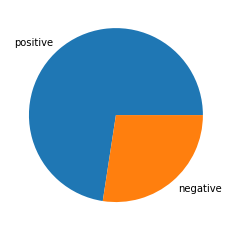

In [31]:
posi=0
nega=0
for i in range (0,len(df_final)):
    get_val=df_final['Comp'][i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(df_final)))*100
negper=(nega/(len(df_final)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)

arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()
plt.show()

In [32]:
df_final = df_final.groupby(df_final.Datetime.dt.floor('30min')).mean()
df_final

,Close,Comp,Negative,Neutral,Positive
Datetime,,,,,
2021-01-06 09:30:00,37.064999,-0.273200,0.149000,0.851000,0.000000
2021-01-06 10:00:00,37.189999,0.077200,0.000000,0.885000,0.115000
2021-01-06 10:30:00,37.294998,0.249940,0.000000,0.954200,0.045800
2021-01-06 11:00:00,37.340000,0.119175,0.000000,0.945000,0.055000
2021-01-06 11:30:00,37.150002,0.068000,0.000000,0.966600,0.033400
...,...,...,...,...,...
2021-02-12 13:00:00,34.775002,0.114522,0.013667,0.965000,0.021333
2021-02-12 13:30:00,34.770000,0.226618,0.006429,0.927000,0.066571
2021-02-12 14:00:00,34.700001,0.168610,0.021650,0.903100,0.075250


In [33]:
df_final = df_final.drop(columns=['Negative','Neutral','Positive'])
df_final

,Close,Comp
Datetime,,
2021-01-06 09:30:00,37.064999,-0.273200
2021-01-06 10:00:00,37.189999,0.077200
2021-01-06 10:30:00,37.294998,0.249940
2021-01-06 11:00:00,37.340000,0.119175
2021-01-06 11:30:00,37.150002,0.068000
...,...,...
2021-02-12 13:00:00,34.775002,0.114522
2021-02-12 13:30:00,34.770000,0.226618
2021-02-12 14:00:00,34.700001,0.168610


In [34]:
from sklearn import preprocessing

x = df_final.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [35]:
df = df.set_index(df_final.index)
df

,0,1
Datetime,,
2021-01-06 09:30:00,0.796242,0.319564
2021-01-06 10:00:00,0.832369,0.521722
2021-01-06 10:30:00,0.862716,0.621381
2021-01-06 11:00:00,0.875722,0.545938
2021-01-06 11:30:00,0.820810,0.516414
...,...,...
2021-02-12 13:00:00,0.134393,0.543254
2021-02-12 13:30:00,0.132948,0.607926
2021-02-12 14:00:00,0.112717,0.574459


In [46]:
result = df_final.join(df)
result

,Close,Comp,0,1
Datetime,,,,
2021-01-06 09:30:00,37.064999,-0.273200,0.796242,0.319564
2021-01-06 10:00:00,37.189999,0.077200,0.832369,0.521722
2021-01-06 10:30:00,37.294998,0.249940,0.862716,0.621381
2021-01-06 11:00:00,37.340000,0.119175,0.875722,0.545938
2021-01-06 11:30:00,37.150002,0.068000,0.820810,0.516414
...,...,...,...,...
2021-02-12 13:00:00,34.775002,0.114522,0.134393,0.543254
2021-02-12 13:30:00,34.770000,0.226618,0.132948,0.607926
2021-02-12 14:00:00,34.700001,0.168610,0.112717,0.574459


In [47]:
result = result.rename(columns={0: 'normalised_close', 1: 'normalised_comp'})
result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-01-06 09:30:00,37.064999,-0.273200,0.796242,0.319564
2021-01-06 10:00:00,37.189999,0.077200,0.832369,0.521722
2021-01-06 10:30:00,37.294998,0.249940,0.862716,0.621381
2021-01-06 11:00:00,37.340000,0.119175,0.875722,0.545938
2021-01-06 11:30:00,37.150002,0.068000,0.820810,0.516414
...,...,...,...,...
2021-02-12 13:00:00,34.775002,0.114522,0.134393,0.543254
2021-02-12 13:30:00,34.770000,0.226618,0.132948,0.607926
2021-02-12 14:00:00,34.700001,0.168610,0.112717,0.574459


In [48]:
result.corr()

,Close,Comp,normalised_close,normalised_comp
Close,1.000000,0.091826,1.000000,0.091826
Comp,0.091826,1.000000,0.091826,1.000000
normalised_close,1.000000,0.091826,1.000000,0.091826
normalised_comp,0.091826,1.000000,0.091826,1.000000


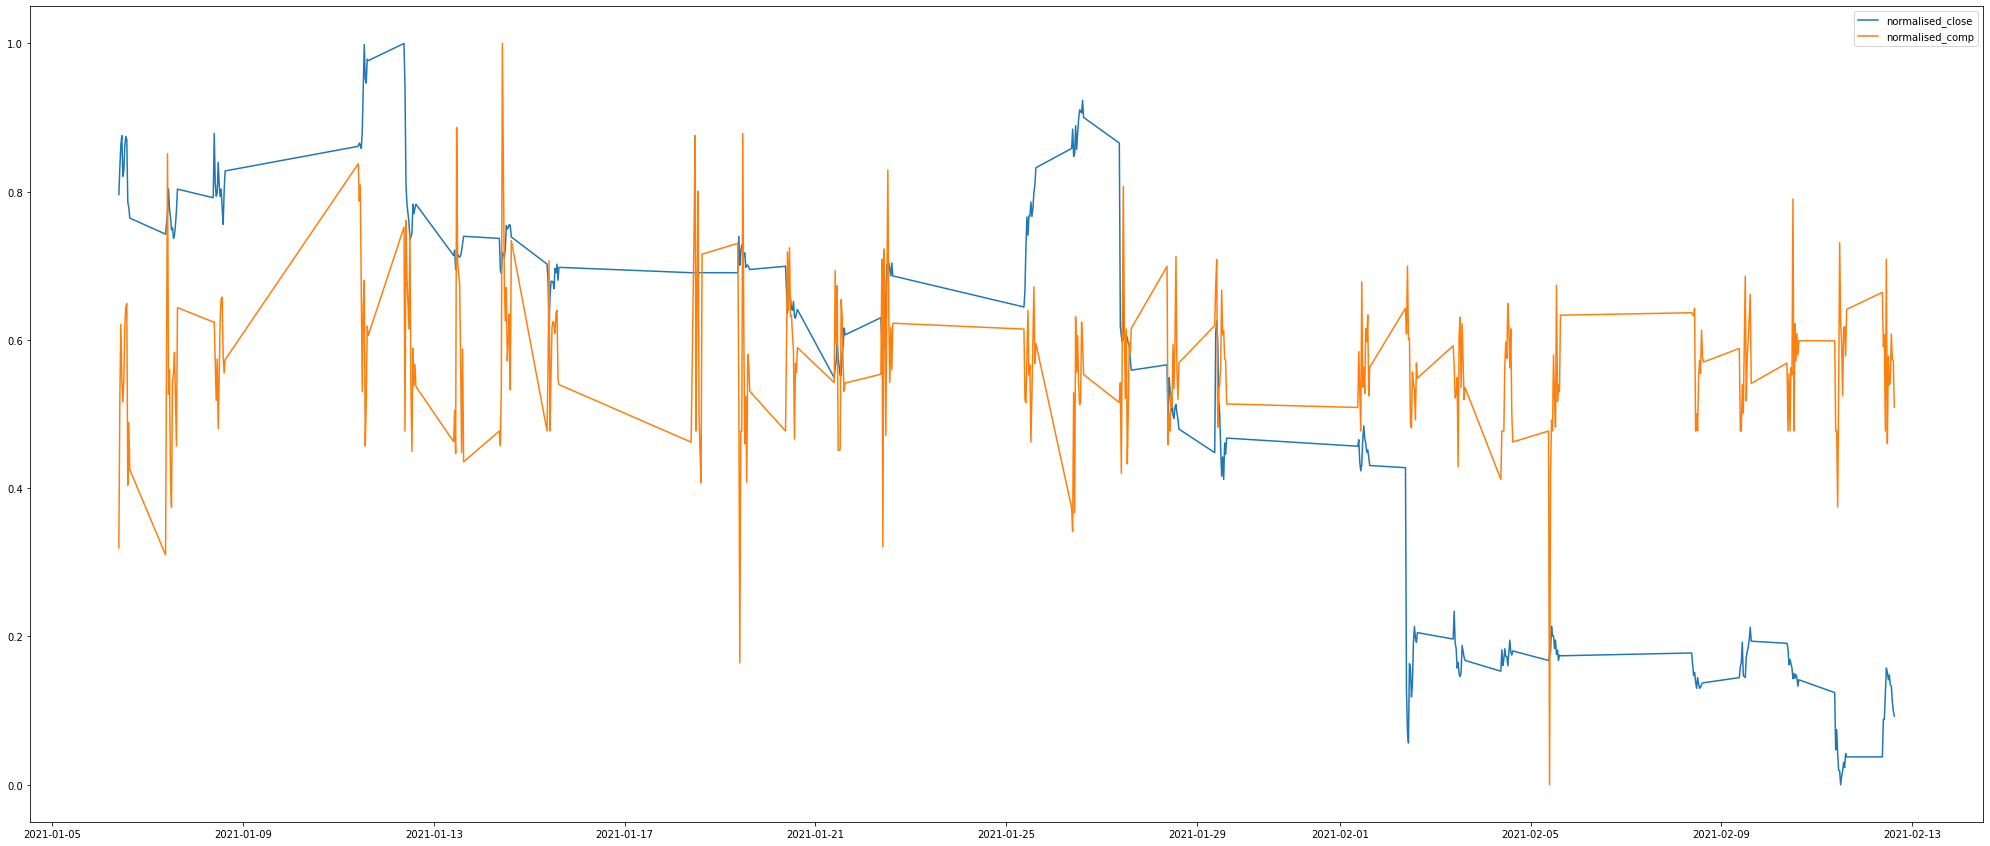

In [49]:
#Plot graphs
fig = plt.figure(figsize=(35,15))
plt.plot(result.index,result['normalised_close'], label = "normalised_close")
plt.plot(result.index,result['normalised_comp'], label = "normalised_comp")
plt.legend()
plt.show()

In [42]:
corr = result.corr()
correlation = (corr['Close'][-1])
counter = 0
while (abs(correlation)<0.3):
  counter = counter - 1
  if counter == len(result):
    break
  else:
    result['Close'] = result['Close'].shift(counter)
  corr = result.corr()
  correlation = (corr['Close'][-1])

In [43]:
result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-01-06 09:30:00,NaN,-0.273200,0.796242,0.319564
2021-01-06 10:00:00,NaN,0.077200,0.832369,0.521722
2021-01-06 10:30:00,NaN,0.249940,0.862716,0.621381
2021-01-06 11:00:00,NaN,0.119175,0.875722,0.545938
2021-01-06 11:30:00,NaN,0.068000,0.820810,0.516414
...,...,...,...,...
2021-02-12 13:00:00,NaN,0.114522,0.134393,0.543254
2021-02-12 13:30:00,NaN,0.226618,0.132948,0.607926
2021-02-12 14:00:00,NaN,0.168610,0.112717,0.574459


In [44]:
result.corr()

,Close,Comp,normalised_close,normalised_comp
Close,NaN,NaN,NaN,NaN
Comp,NaN,1.000000,0.091826,1.000000
normalised_close,NaN,0.091826,1.000000,0.091826
normalised_comp,NaN,1.000000,0.091826,1.000000


In [45]:
final_result = result.dropna()
final_result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
